In [3]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://data.colorado.gov/resource/tv8u-hswn.json?$where=age between 20 and 25 and year between 2020 and 2025&county=Boulder&$select=year,age,femalepopulation"
url = url.replace(' ', '%20')
url

'https://data.colorado.gov/resource/tv8u-hswn.json?$where=age%20between%2020%20and%2025%20and%20year%20between%202020%20and%202025&county=Boulder&$select=year,age,femalepopulation'

In [4]:
dem_data_20_25_female = pd.read_json(url)
dem_data_20_25_female.head()

,year,age,femalepopulation
0,2024,20,3872
1,2024,21,3826
2,2024,23,2623
3,2025,23,2744
4,2022,21,3639


In [5]:
dem_data_20_25_female = dem_data_20_25_female.set_index('year')
dem_data_20_25_female.head()

,age,femalepopulation
year,,
2024,20,3872
2024,21,3826
2024,23,2623
2025,23,2744
2022,21,3639


In [6]:
# Pivot the data for stacked plotting
dem_data_20_25_female_pivot = dem_data_20_25_female.pivot_table('femalepopulation', 'year', 'age')
dem_data_20_25_female_pivot

age,20,21,22,23,24,25
year,,,,,,
2020,3830.0,3647.0,3290.0,2610.0,2268.0,2173.0
2021,3750.0,3681.0,3201.0,2676.0,2194.0,2240.0
2022,3876.0,3639.0,3267.0,2610.0,2276.0,2185.0
2023,3941.0,3753.0,3216.0,2670.0,2206.0,2262.0
2024,3872.0,3826.0,3336.0,2623.0,2268.0,2196.0
2025,3784.0,3757.0,3409.0,2744.0,2222.0,2259.0


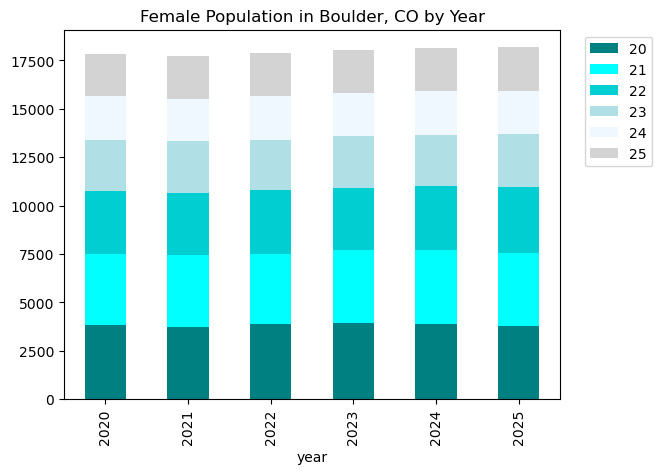

In [8]:
# Plot the data in a bar plot
my_colors = ['teal', 'aqua', 'darkturquoise', 'powderblue', 'aliceblue', 'lightgrey']
f, ax = plt.subplots()
dem_data_20_25_female_pivot.plot.bar(ax=ax,
                                     color=my_colors,
                                     stacked=True).legend(bbox_to_anchor=(1.2, 1), loc='upper right')
ax.set(title='Female Population in Boulder, CO by Year')
plt.show()
                                                                      